# Определение стоимости автомобиля

## Описание проекта

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

### Описание данных

- **DateCrawled** — дата скачивания анкеты из базы
- **VehicleType** — тип автомобильного кузова
- **RegistrationYear** — год регистрации автомобиля
- **Gearbox** — тип коробки передач
- **Power** — мощность (л. с.)
- **Model** — модель автомобиля
- **Kilometer** — пробег (км)
- **RegistrationMonth** — месяц регистрации автомобиля
- **FuelType** — тип топлива
- **Brand** — марка автомобиля
- **NotRepaired** — была машина в ремонте или нет
- **DateCreated** — дата создания анкеты
- **NumberOfPictures** — количество фотографий автомобиля
- **PostalCode** — почтовый индекс владельца анкеты (пользователя)
- **LastSeen** — дата последней активности пользователя

## Задание

### Построить модель для определения стоимости автомобиля.

---

# 1. Подготовка данных

### Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загружаем данные

In [2]:
#autos = pd.read_csv('/datasets/autos.csv')
autos = pd.read_csv('D:/3D Objects/Praktikum/Data/autos.csv')

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [4]:
autos.head(15)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


Видим, что датасет содержит 16 столбцов и 354 тысячи строк.

**Заметны следующие проблемы:**

- Пропуски в некоторых столбцах, особенно в **VehicleType, FuelType, NotRepaired**.
- Даты событий записаны в формате object
- Цена, мощность и месяц регистрации некоторых автомобилей равны нулю, что говорит об отсутствии этих данных.

## Предобработка

Предобработка данных будет состоять из:

- Удаление нерелевантных задаче столбцов
- Приведение различных дат в соответствующий формат
- Удаление записей, в которых отсутствует целевой признак (**Price** = 0)
- Проверка на наличие дубликатов
- Обработка пропусков

### Удаление лишних столбцов

Столбцы
- **DateCrawled** — дата скачивания анкеты из базы
- **PostalCode** — почтовый индекс владельца анкеты (пользователя)
- **LastSeen** — дата последней активности пользователя
- **DateCreated** — дата последней активности пользователя
- **RegistrationMonth** - месяц регистрации автомобиля
- **NumberOfPictures** - количество изображений

не имеют отношения ни к автомобилю ни к анкете, а значит не влияют на его цену.\
Можно смело их удалять.

Удаляем указанные выше стобцы:

In [5]:
autos = autos.drop(['DateCrawled', 'PostalCode',
                    'LastSeen', 'DateCreated',
                    'RegistrationMonth',
                    'NumberOfPictures'], axis=1)

autos.head(3)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN


### Приведение даты в соответствующий формат

Поскольку после предыдущего шага не осталось столбцов с датами, то и приводить к нужному формату неичего не нужно.\
Переходим к следующему шагу.

### Удаление записей без целевого признака

Видно, что в таблице присутствует некоторое количество записей с нулевой ценой, что, очевидно, не соответствует действительности.\
Узнаем, сколько таких записей:

In [6]:
len(autos[autos['Price'] == 0])

10772

10.7 тысяч записей.\
Это приблизительно 3% от общего числа, значит проблем с нехваткой данных для обучения не возникнет.

Удалим эти строки:

In [7]:
autos = autos[autos['Price'] != 0].reset_index(drop=True)
len(autos[autos['Price'] == 0])

0

Также по первой строке видно, что встречаются некорректные значения в столбце **Power** (0).\
Возможно, это говорит о том, что машина не на ходу, либо пользователь просто не указал значение мощности автомобиля.\
В любом случае это информация может быть полезна, поэтому оставим как есть.

### Проверка на дубликаты

По различным причинам (объявление считалось несколько раз, пользователь опубликовал одинаковые объявления и др.) в данных могли появиться дубликаты.\
Проверим, так ли это:

In [8]:
autos.duplicated().sum()

43172

Дубликатов довольно много, это может привести к тому, что при разделении данных на выборки, в них может оказаться много одинаковых записей, что приведет к ложному завышению качества модели.\
Удалим их:

In [9]:
autos = autos.drop_duplicates().reset_index(drop=True)
autos.duplicated().sum()

0

### Обработка пропусков

Еще раз взглянем на информацию о таблице:

In [10]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300425 entries, 0 to 300424
Data columns (total 10 columns):
Price               300425 non-null int64
VehicleType         268755 non-null object
RegistrationYear    300425 non-null int64
Gearbox             285004 non-null object
Power               300425 non-null int64
Model               283748 non-null object
Kilometer           300425 non-null int64
FuelType            272354 non-null object
Brand               300425 non-null object
NotRepaired         240106 non-null object
dtypes: int64(4), object(6)
memory usage: 22.9+ MB


Почти во всех столбцах, содержащих категориальные переменные, содержатся пропуски.\
Удаление записей с пропусками нежелательно, поскольку информация о наличии пропуска также может быть полезной.

Поскольку предстоит кодировать эти признаки, заполним пропуски в этих столбцах на произвольное значение, например **hidden**.

In [11]:
autos = autos.fillna('hidden')
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300425 entries, 0 to 300424
Data columns (total 10 columns):
Price               300425 non-null int64
VehicleType         300425 non-null object
RegistrationYear    300425 non-null int64
Gearbox             300425 non-null object
Power               300425 non-null int64
Model               300425 non-null object
Kilometer           300425 non-null int64
FuelType            300425 non-null object
Brand               300425 non-null object
NotRepaired         300425 non-null object
dtypes: int64(4), object(6)
memory usage: 22.9+ MB


Остались следующие столбцы с пропусками: **VehicleType, Gearbox, Model, FuelType, Brand**.\
Каждый из этих столбцов содержит категориальные переменные, поэтому уместно использовать **OrdinalEncoder**:

In [12]:
from sklearn.preprocessing import OrdinalEncoder

categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

oe = OrdinalEncoder()
autos[categorical_features] = oe.fit_transform(autos[categorical_features])
autos.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,3.0,1993,2.0,0,116.0,150000,7.0,38.0,0.0
1,18300,2.0,2011,2.0,190,118.0,125000,2.0,1.0,2.0
2,9800,7.0,2004,0.0,163,117.0,125000,2.0,14.0,0.0
3,1500,6.0,2001,2.0,75,116.0,150000,7.0,38.0,1.0
4,3600,6.0,2008,2.0,69,101.0,90000,2.0,31.0,1.0


Посмотрим на значения в столбце **RegistrationYear**:

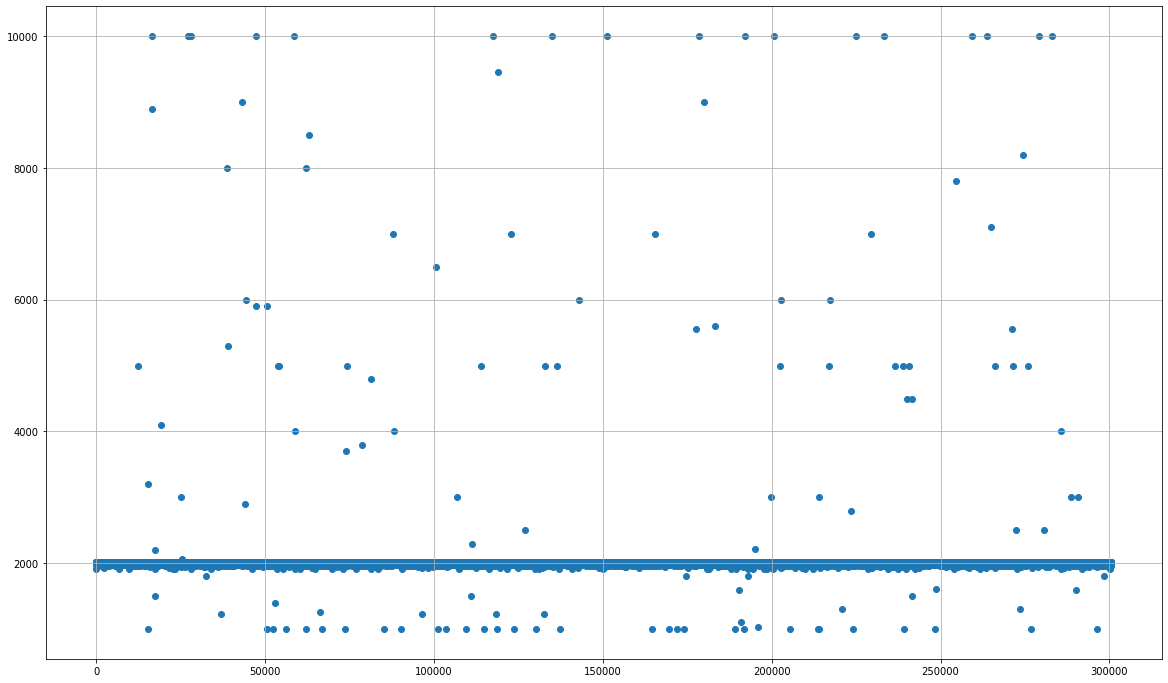

In [13]:
plt.figure(figsize=(20,12))
plt.scatter(autos.index, autos['RegistrationYear'])
plt.grid(True)

Видим, что встречаются аномальные значения.

Посмотрим сколько их:\
(Считаем, что год должен быть в диапазоне от 1885 г. до 2020 г.)

In [14]:
autos[(autos['RegistrationYear'] < 1885) | (autos['RegistrationYear'] > 2020)]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
12447,49,3.0,5000,1.0,0,116.0,5000,3.0,38.0,0.0
15227,1700,3.0,3200,1.0,0,118.0,5000,3.0,33.0,0.0
15406,190,3.0,1000,1.0,0,155.0,5000,3.0,10.0,0.0
16553,700,3.0,9999,1.0,0,167.0,10000,3.0,24.0,0.0
16621,6500,3.0,8888,1.0,0,118.0,10000,3.0,33.0,0.0
...,...,...,...,...,...,...,...,...,...,...
288562,50,3.0,3000,1.0,3000,116.0,100000,3.0,38.0,2.0
290045,700,3.0,1600,2.0,1600,28.0,150000,7.0,1.0,1.0
290826,1,3.0,3000,1.0,0,250.0,5000,3.0,24.0,0.0
296210,1,3.0,1000,1.0,1000,118.0,150000,3.0,33.0,0.0


Всего 134 строки с невозможными значениями столбца **RegistrationYear**.\
Лучше их удалить, поскольку они составляют ничтожно малую часть от всего датасета.

In [15]:
autos = autos[(autos['RegistrationYear'] > 1885) & (autos['RegistrationYear'] < 2020)].reset_index(drop=True)
len(autos)

300291

### Разделение данных на выборки

В конце воспользуемся методами библитоеки **sklearn** для разделения данных на **3** выборки в соотношении **3:1:1**.
- Обучающая (60%)
- Валидационная (20%)
- Тестовая (20%)

In [16]:
from sklearn.model_selection import train_test_split

features_train, features_test_valid, target_train, target_test_valid = train_test_split(
autos.drop(['Price'], axis=1), autos['Price'], test_size=0.4, random_state=42
)

features_test, features_valid, target_test, target_valid = train_test_split(
features_test_valid, target_test_valid, test_size=0.5, random_state=42)

Данные разбиты на выборки, можно приступать к построению и настройке моделей.

---

# 2. Обучение моделей

Обучение будем проводить с помощью библиотеки **LightGBM**.\
Ключевая метрика, по условию задачи - **RMSE**.

Последовательность при работе будет следующая:
- Создание и оценка константной модели (для дальнейшего сравнения)
- Создание базовой модели регрессии и её оценка
- Тюнинг гиперпараметров
- Выбор оптимальной модели по точности и скорости работы.

#### Импортируем необходимые библиотеки

In [17]:
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

#### Создадим функцию для подсчета *RMSE*

In [18]:
def rmse(target, prediction):
    return mean_squared_error(target, prediction)**0.5

## Построение константной модели

Данная модель будет предсказывать **среднюю цену** (оптимально для **rmse**) автомобилей во всех объявлениях.

In [19]:
constant_pred = pd.Series(target_valid.mean(), index=target_valid.index)
rmse(target_valid, constant_pred)

4570.086796127868

Получили значение метрики 4.5к - в дальнейшем будем использовать его для проверки адекватности моделей.

## Создание базовой модели

Предварительно необходимо создать датасеты для LightGBM:

In [20]:
lgb_train = lgb.Dataset(features_train, target_train, free_raw_data=False,
                        categorical_feature = categorical_features)
lgb_eval = lgb.Dataset(features_valid, target_valid, reference=lgb_train, free_raw_data=False,
                      categorical_feature = categorical_features)

Зададим начальные параметры, метрику выбираем **mse**, поскольку **RMSE** является производной от нее:

In [21]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric' : 'mse',
    'learning_rate' : 0.01,
    'bagging_fraction' : 0.8,
    'bagging_freq' : 5,
}

Обучим и оценим модель. Для начала укажем 100 итераций:

In [22]:
%%time

gbm_model = lgb.train(params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      early_stopping_rounds=5)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[1]	valid_0's l2: 2.0588e+07
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 2.02959e+07
[3]	valid_0's l2: 2.00094e+07
[4]	valid_0's l2: 1.97286e+07
[5]	valid_0's l2: 1.94544e+07
[6]	valid_0's l2: 1.91854e+07
[7]	valid_0's l2: 1.89218e+07
[8]	valid_0's l2: 1.86634e+07
[9]	valid_0's l2: 1.84098e+07
[10]	valid_0's l2: 1.81613e+07
[11]	valid_0's l2: 1.79163e+07
[12]	valid_0's l2: 1.76761e+07
[13]	valid_0's l2: 1.74404e+07
[14]	valid_0's l2: 1.72109e+07
[15]	valid_0's l2: 1.69847e+07
[16]	valid_0's l2: 1.6763e+07
[17]	valid_0's l2: 1.65426e+07
[18]	valid_0's l2: 1.63282e+07
[19]	valid_0's l2: 1.61167e+07
[20]	valid_0's l2: 1.59075e+07
[21]	valid_0's l2: 1.57026e+07
[22]	valid_0's l2: 1.55044e+07
[23]	valid_0's l2: 1.53075e+07
[24]	valid_0's l2: 1.51171e+07
[25]	valid_0's l2: 1.49258e+07
[26]	valid_0's l2: 1.47408e+07
[27]	valid_0's l2: 1.45576e+07
[28]	valid_0's l2: 1.43781e+07
[29]	valid_0's l2: 1.42043e+07
[30]	valid_0's l2: 1.4032e+07
[31]	valid_0's l2: 1.3

In [23]:
prediction = gbm_model.predict(features_train, num_iteration=gbm_model.best_iteration)
print('RMSE Train:', rmse(target_train, prediction))

prediction = gbm_model.predict(features_valid, num_iteration=gbm_model.best_iteration)
print('RMSE Valid:', rmse(target_valid, prediction))

prediction = gbm_model.predict(features_test, num_iteration=gbm_model.best_iteration)
print('RMSE Test:', rmse(target_test, prediction))

RMSE Train: 2651.195525548925
RMSE Valid: 2658.254390671997
RMSE Test: 2669.327130424343


Получаем RMSE значительно лучше - 2648 без настройки параметров.\
Время обучения - 0.7 секунд.

Опытным путем подберем оптимальное значение следующих параметров:
- learning_rate
- num_leaves
- max_depth
- min_data_in_leaf
- max_bin
- learning_rate
- feature_fraction

Также изменим **boosting_type** на **dart**, поскольку этот алгоритм, как правило, дает лучшие результаты. Недостатком же является повышенное время обучения.

In [ ]:
%%time
params_optimal = {
    'boosting_type': 'dart',
    'objective': 'regression',
    'metric' : 'mse',
    'learning_rate' : 0.1,
    'feature_fraction' : 0.7,
    'bagging_fraction' : 0.8,
    'bagging_freq' : 5,
    'num_leaves' : 80,
    'max_depth' : 9,
    'max_bin' : 20,
    'min_data_in_leaf' : 15,
}

gbm_model = lgb.train(params_optimal,
                      lgb_train,
                      num_boost_round=2000,
                      valid_sets=lgb_eval,
                      early_stopping_rounds=5)

In [ ]:
%%time
prediction = gbm_model.predict(features_train, num_iteration=gbm_model.best_iteration)
print('RMSE Train:', rmse(target_train, prediction))

prediction = gbm_model.predict(features_valid, num_iteration=gbm_model.best_iteration)
print('RMSE Valid:', rmse(target_valid, prediction))

Построенная модель достаточно сильно переобучилась, однако значение метрики на валидационной выборке при таких параметрах минимально.

Дальнейшее улучшение целевой метрики потребует значительных временных затрат и вычислительных мощностей, необоснованно повышающих время на обучение моделей, что в рамках данной задачи является нежелательным.

RMSE на валидационной выборке - 1615.\
Время обучения модели 4 мин. 8 с.

Посчитаем конечное значение RMSE на тестовой выборке:

In [ ]:
%%time
prediction = gbm_model.predict(features_test, num_iteration=gbm_model.best_iteration)
print('RMSE Test:', rmse(target_test, prediction))

---

### Для сравнения, посмотрим какие показатели покажут модели линейной регрессии и случайного леса.

#### Линейная регрессия

In [19]:
from sklearn.linear_model import LinearRegression

Перед обучением требуется закодировать категориальные признаки методом OHE, с параметром drop_first=True, чтобы избежать дамми-ловушки:

In [20]:
autos_OHE = pd.get_dummies(autos, columns=categorical_features, drop_first=True)
autos_OHE.head(3)

,Price,RegistrationYear,Power,Kilometer,VehicleType_1.0,VehicleType_2.0,VehicleType_3.0,VehicleType_4.0,VehicleType_5.0,VehicleType_6.0,...,Brand_32.0,Brand_33.0,Brand_34.0,Brand_35.0,Brand_36.0,Brand_37.0,Brand_38.0,Brand_39.0,NotRepaired_1.0,NotRepaired_2.0
0,480,1993,0,150000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,18300,2011,190,125000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Снова разделим на выборки:

In [21]:
from sklearn.model_selection import train_test_split

features_train_OHE, features_test_valid_OHE, target_train_OHE, target_test_valid_OHE = train_test_split(
autos_OHE.drop(['Price'], axis=1), autos_OHE['Price'], test_size=0.4, random_state=42
)

features_test_OHE, features_valid_OHE, target_test_OHE, target_valid_OHE = train_test_split(
features_test_valid_OHE, target_test_valid_OHE, test_size=0.5, random_state=42)

Обучение модели:

In [22]:
%%time
reg_model = LinearRegression(normalize=True)
reg_model.fit(features_train_OHE, target_train_OHE)

CPU times: user 14.2 s, sys: 7.96 s, total: 22.1 s
Wall time: 22.1 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Оценка модели

In [23]:
%%time
prediction = reg_model.predict(features_train_OHE)
print('RMSE Train:', rmse(target_train_OHE, prediction))

prediction = reg_model.predict(features_valid_OHE)
print('RMSE Valid:', rmse(target_valid_OHE, prediction))

prediction = reg_model.predict(features_test_OHE)
print('RMSE Test:', rmse(target_test_OHE, prediction))

RMSE Train: 2892.1961935106315
RMSE Valid: 2908.7990894804257
RMSE Test: 2937.7182606580386
CPU times: user 376 ms, sys: 720 ms, total: 1.1 s
Wall time: 1.04 s


Видим, что модель обучается и делает предсказания практически мгновенно, однако значение **RMSE** довольно высоко, хотя и лучше, чем константной модели. Переобучения нет.

То есть **качество модели удовлетворительное**, проверку на адекватность проходит.

---

#### Случайный лес

Настройку гиперпараметров для случайного леса будем проводить с помощью метода **RandomzedSearchCV**.\
Оценку проводим при помощи созданной ранее функции **rmse**.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

Функция для оценки качества модели:

In [31]:
rmse_score = make_scorer(rmse, greater_is_better=False)

Обучение модели:

In [32]:
%%time

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]

max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 15, num = 5)]

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

forest_model = RandomForestRegressor()

forest_random = RandomizedSearchCV(estimator = forest_model,
                                   scoring=rmse_score,
                                   param_distributions = random_grid,
                                   n_iter = 6, cv = 4,
                                   verbose=2, random_state=42, n_jobs = -1)

forest_random.fit(features_train, target_train)
forest_random.best_params_

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=12, bootstrap=True 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=12, bootstrap=True, total=   5.2s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=12, bootstrap=True 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=12, bootstrap=True, total=   5.2s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=12, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=12, bootstrap=True, total=   5.2s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=12, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=12, bootstrap=True, total=   5.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=15, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=15, bootstrap=True, total=  13.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=15, bootstrap=True 
[CV]  n_estimators=100, min_samples_

[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 13.8min finished


CPU times: user 13min 55s, sys: 684 ms, total: 13min 55s
Wall time: 14min 5s


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15,
 'bootstrap': True}

Сохраняем и оцениваем модель:

In [33]:
%%time
forest_model = forest_random.best_estimator_

prediction = forest_model.predict(features_train)
print('RMSE Train:', rmse(target_train, prediction))

prediction = forest_model.predict(features_valid)
print('RMSE Valid:', rmse(target_valid, prediction))

prediction = forest_model.predict(features_test)
print('RMSE Test:', rmse(target_test, prediction))

RMSE Train: 1495.663733304604
RMSE Valid: 1753.6612885690167
RMSE Test: 1757.4097139748264
CPU times: user 6.67 s, sys: 0 ns, total: 6.67 s
Wall time: 6.71 s


Модель **Случайного леса** несколько переобучилась, однако значение **RMSE** близко к модели **LightGBM**.

То есть качество приемлемое, хоть и уступает алгоритму бустинга.

Непосредственное обучение модели происходит довольно быстро, в пределах 30 секунд, однако требуется время на подбор гиперпараметров.

Выходит, случайный лес является золотой серединой, поскольку обучение не требует больших временных затрат, а конечное качество модели довольно высоко.

---

# Вывод:

При решении задачи удалось добиться следующих показателей работы моделей:

#### Градиентный бустинг

- **Конечное значение RMSE: 1630**
- **Время обучения модели: 4 мин. 12 с.**
- **Время дачи предсказаний на тестовой выборке: 6 секунд.**

#### Линейная регрессия

- **Конечное значение RMSE: 2937**
- **Время обучения модели: меньше 1 с.**
- **Время дачи предсказаний на тестовой выборке: меньше 1 с.**

#### Случайный лес

- **Конечное значение RMSE: 1644**
- **Время обучения модели: 2 мин. 35 с.**
- **Время дачи предсказаний на тестовой выборке: 4 секунд.**

Модель линейной регресси дает показания не сильно лучше константной, то есть едва проходит проверку на адекватность. Единственный плюс - высокая скорость работы

Модели бустинга и Случайного леса напротив же, не отличаются высокой скоростью, однако дают качество предсказаний значительно выше.

---
### Предпочтение стоит отдать модели Градинентного бустинга, поскольку она обладает наибольшей точностью, а время работы остается в приемлемых рамках.

---

Отдельно стоит уточнить природу появления дубликатов. Довольно большая часть (порядка 40 тысяч записей) данных состояла из дубликатов, и была удалена в ходе предобработки.\
Если это не ошибка в данных, и удалять их не требуется, то конечное значение метрики, очевидно, было бы ниже.

Также стоит узнать причину, по которой цена некоторых автомобилей была равна нулю, что также привело к удалению части записей, т.к. в них отстутствовал целевой признак.

### Задача выполнена, учтены все пожелания заказчика.